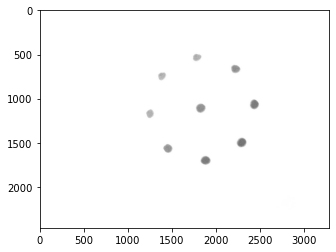

1
[[[2426 1068   50]
  [2286 1498   51]
  [1870 1704   47]
  [1816 1108   52]
  [2214  668   47]
  [1444 1566   51]
  [1244 1174   43]
  [2264 1502   40]
  [1834 1098   34]
  [2196  658   38]
  [2416 1052   35]
  [2280 1478   33]
  [1376  756   35]
  [1884 1686   32]
  [1378  736   32]
  [1444 1546   33]]]
[2426 1068   50]
16
1898
1206
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
3
1816
1108
52
8
1834
1098
34
this is avg distance in pixel
516


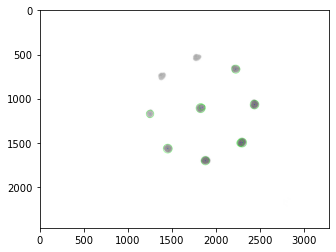

In [6]:
# 第一次加强contrast
# 再来一次加强contrast
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
    
img = cv2.imread(r'foo77.jpg', cv2.IMREAD_GRAYSCALE)#GRAYSCALE
 
#线性变换
a = 2
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)

cv2.imwrite("Improved107.jpg", O)
cv2.waitKey(0)
cv2.destroyAllWindows()    

img = cv2.imread(r'Improved107.jpg', cv2.IMREAD_GRAYSCALE)#GRAYSCALE
 
#线性变换
a = 2
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)

cv2.imwrite("Improved207.jpg", O)
cv2.waitKey(0)
cv2.destroyAllWindows()  


# 找中间圆和检测其他圆
# minr 30 MAXR 50

#https://developpaper.com/opencv-hough-circle-transform-cv2-houghcircles/
#Hoff circle detection
from matplotlib import pyplot as plt
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow #https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow

cimg = cv2.imread('Improved207.jpg')
plt.imshow(cimg)
plt.show()
#cv2.waitKey(0)
img = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

#- img: grayscale image to be detected
# - cv2.HOUGH_ Gradient: detection method, Hoff gradient
#- 1: the detected circle has the same size as the original image, DP = 2, and the detected circle is half of the original image
#- 20: the minimum distance of the center of the detected circle (if the parameter is too small, multiple adjacent circles may be detected incorrectly in addition to a real circle. If it is too large, some circles may be missed.)
#- Param1: in #hough Š In the case of u gradient, it is higher. Two thresholds are passed to Canny edge detector (the lower one is twice as small).
#- param2: at #hough Š In the case of u gradient, it is the accumulator threshold of the center of the detection stage. The smaller it is, the more likely it is to detect false circles;
#- minradius: minimum circle radius, false circle may also be detected
#- maxradius: maximum circle radius. If < = 0, the maximum image size is used. If < 0, returns the center of the radius not found.
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,param1=50, param2=30, minRadius=30, maxRadius=60)
#If the minimum circle radius is not set properly, false circles may also be detected
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
#                            param1=50, param2=40, minRadius=0, maxRadius=0)
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
#                            param1=50, param2=30, minRadius=10, maxRadius=0)

circles = np.uint16(np.around(circles))

print(len(circles))
print(circles)
print(circles[0,0])

# finding center circle 
prev = 0
sumX = 0
sumY = 0
n = 0
Xavg = 0
Yavg = 0
for i in circles[0, :]:
    sumX = sumX + i[0]
    sumY = sumY + i[1]
    n = n + 1
    
Xavg = sumX / n
Yavg = sumY / n
print(n)
print(int(Xavg))
print(int(Yavg))
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

# find the center circle
centerX = 0;
centerY = 0;
m = 0
for i in circles[0, :]:
    if i[0] < Xavg + 150 and Xavg - 150 < i[0]:
        if i[1] < Yavg + 150 and Yavg - 150 < i[1]:  
            centerX = i[0]
            centerY = i[1]
            print(m)
            print(i[0])
            print(i[1])
            print(i[2])
    m = m + 1
k = 0
for i in circles[0, :]:
  if k < 9:
    #Draw outer circle (blue)
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

    #Draw Center (red)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    k = k+1
#     cv2_imshow(cimg)
    plt.imshow(cimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
avgD = 0;
D = 0;
n = 0;
for i in circles[0, :]:
    n = n + 1
    D = D + int(math.sqrt(int(math.pow((int(i[0]) - int(centerX)),2)) + int(math.pow((int(i[1]) - int(centerY)),2))))
#     print(n)
#     print(int(i[0]))
#     print(centerX)
#     print(int(i[0]) - int(centerX))
#     print(int(math.pow(int(i[0]) - int(centerX),2))
#     print(D)
#     D = D + math.sqrt(int(math.pow((i[0] - centerX),2)) + int(math.pow((i[1] - centerY),2)))

avgD = D / n
print('this is avg distance in pixel')
print(int(avgD))